In [7]:
import pandas as pd
series=pd.read_excel(r'C:\Users\Ronny\Desktop\ogauge_new\Range 14  for 2 bar.xlsx',header=0, index_col=0)
print(series)

          2.011
11:30:01       
11:30:02  2.013
11:30:03  2.013
11:30:04  2.012
11:30:05  2.013
11:30:06  2.012
...         ...
12:29:56  2.023
12:29:57  2.022
12:29:58  2.025
12:29:59  2.024
12:30:00  2.024

[3599 rows x 1 columns]


In [8]:
series.describe()

,2.011
count,3599.000000
mean,2.002198
std,0.020361
min,1.952000
25%,1.985000
50%,2.005000
75%,2.019000
max,2.037000


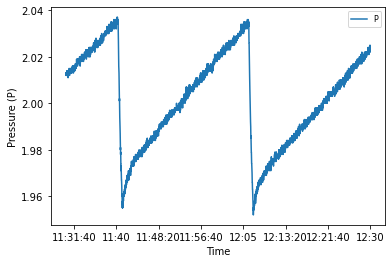

In [9]:
from matplotlib import pyplot
series.plot()
pyplot.xlabel('Time')
pyplot.ylabel('Pressure (P)')
pyplot.legend('Pressure', loc='upper right', fontsize=8)
pyplot.show()

In [10]:
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
values=DataFrame(series.values)
dataframe=concat([values.shift(1),values], axis=1)
dataframe.columns=['t-1','t+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.997796
t+1  0.997796  1.000000


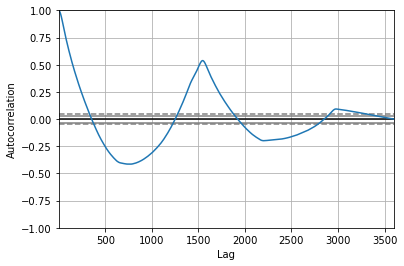

In [11]:
from pandas.plotting import autocorrelation_plot
series=pd.read_excel(r'C:\Users\Ronny\Desktop\ogauge_new\Range 14  for 2 bar.xlsx',header=0, index_col=0)
autocorrelation_plot(series)
pyplot
pyplot.show()

Text(0.5, 0, 'Lag')

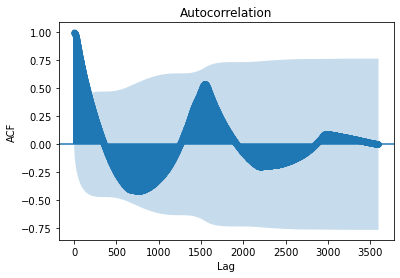

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf
acf_plot = plot_acf( series,lags=3598)
pyplot.ylabel('ACF')
pyplot.xlabel('Lag')

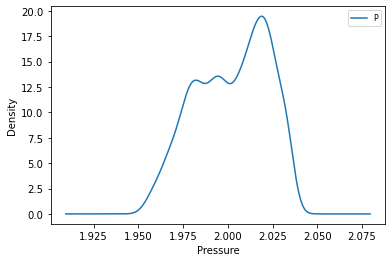

In [13]:
series=pd.read_excel(r'C:\Users\Ronny\Desktop\ogauge_new\Range 14  for 2 bar.xlsx',header=0, index_col=0)
series.plot(kind='kde')
pyplot.xlabel('Pressure')
pyplot.legend('Pressure', loc='upper right', fontsize=8)
pyplot.show()

C:\Users\Ronny\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


Coefficients: [ 0.00434669  0.41583969  0.31112761  0.22789864  0.13931919  0.13370192
  0.06568751 -0.02261281 -0.05817111 -0.12253654 -0.09242503]
predicted=2.011460, expected=2.012000
predicted=2.011356, expected=2.010000
predicted=2.011307, expected=2.010000
predicted=2.011212, expected=2.012000
predicted=2.011507, expected=2.010000
predicted=2.011808, expected=2.011000
predicted=2.011749, expected=2.012000
predicted=2.011749, expected=2.010000
predicted=2.011642, expected=2.009000
predicted=2.011577, expected=2.012000
predicted=2.011728, expected=2.012000
predicted=2.011773, expected=2.012000
predicted=2.011797, expected=2.012000
predicted=2.011788, expected=2.013000
predicted=2.011747, expected=2.011000
predicted=2.011737, expected=2.011000
predicted=2.011750, expected=2.010000
predicted=2.011762, expected=2.011000
predicted=2.011771, expected=2.011000
predicted=2.011759, expected=2.011000
predicted=2.011736, expected=2.010000
predicted=2.011722, expected=2.010000
predicted=2.011

predicted=2.002355, expected=1.998000
predicted=2.002355, expected=1.996000
predicted=2.002354, expected=1.995000
predicted=2.002354, expected=1.997000
predicted=2.002354, expected=1.997000
predicted=2.002353, expected=1.996000
predicted=2.002353, expected=1.996000
predicted=2.002352, expected=1.997000
predicted=2.002352, expected=1.995000
predicted=2.002352, expected=1.997000
predicted=2.002351, expected=1.996000
predicted=2.002351, expected=1.998000
predicted=2.002350, expected=1.995000
predicted=2.002350, expected=1.996000
predicted=2.002350, expected=1.997000
predicted=2.002349, expected=1.998000
predicted=2.002349, expected=1.996000
predicted=2.002349, expected=1.996000
predicted=2.002348, expected=1.998000
predicted=2.002348, expected=1.996000
predicted=2.002347, expected=1.996000
predicted=2.002347, expected=1.997000
predicted=2.002347, expected=1.996000
predicted=2.002346, expected=1.997000
predicted=2.002346, expected=1.998000
predicted=2.002346, expected=1.996000
predicted=2.

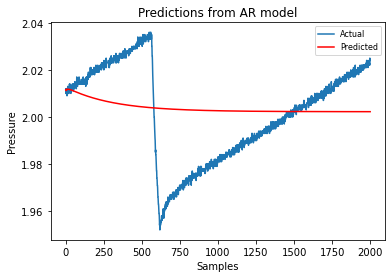

In [14]:
# create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt
# load dataset
series=pd.read_excel(r'C:\Users\Ronny\Desktop\ogauge_new\Range 14  for 2 bar.xlsx',header=0, index_col=0)
# split dataset
X = series.values
train, test = X[1:len(X)-2000], X[len(X)-2000:]
# train autoregression
model = AutoReg(train, lags=10)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
mape = 100*(mean_absolute_percentage_error(test,predictions))
print('Test RMSE: %.3f' % rmse)
print('Test MAPE: %.3f' % mape)
# plot results
pyplot.title('Predictions from AR model')
pyplot.plot(test, label='Actual')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.xlabel('Samples')
pyplot.ylabel('Pressure')
pyplot.legend(loc='upper right', fontsize=8)
pyplot.show()

C:\Users\Ronny\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


Coefficients: [ 0.00434669  0.41583969  0.31112761  0.22789864  0.13931919  0.13370192
  0.06568751 -0.02261281 -0.05817111 -0.12253654 -0.09242503]
predicted=2.011460, expected=2.012000
predicted=2.011581, expected=2.010000
predicted=2.010911, expected=2.010000
predicted=2.010370, expected=2.012000
predicted=2.011195, expected=2.010000
predicted=2.011012, expected=2.011000
predicted=2.010796, expected=2.012000
predicted=2.011092, expected=2.010000
predicted=2.010617, expected=2.009000
predicted=2.009771, expected=2.012000
predicted=2.010686, expected=2.012000
predicted=2.011426, expected=2.012000
predicted=2.011617, expected=2.012000
predicted=2.011750, expected=2.013000
predicted=2.012550, expected=2.011000
predicted=2.012151, expected=2.011000
predicted=2.011899, expected=2.010000
predicted=2.011300, expected=2.011000
predicted=2.010984, expected=2.011000
predicted=2.010589, expected=2.011000
predicted=2.010523, expected=2.010000
predicted=2.010100, expected=2.010000
predicted=2.009

predicted=1.992796, expected=1.992000
predicted=1.992429, expected=1.992000
predicted=1.992095, expected=1.994000
predicted=1.992861, expected=1.993000
predicted=1.993079, expected=1.994000
predicted=1.993449, expected=1.993000
predicted=1.993394, expected=1.994000
predicted=1.993847, expected=1.994000
predicted=1.994033, expected=1.994000
predicted=1.994267, expected=1.994000
predicted=1.994337, expected=1.993000
predicted=1.993779, expected=1.993000
predicted=1.993436, expected=1.994000
predicted=1.993629, expected=1.994000
predicted=1.993773, expected=1.994000
predicted=1.993837, expected=1.993000
predicted=1.993403, expected=1.995000
predicted=1.994080, expected=1.994000
predicted=1.994182, expected=1.995000
predicted=1.994703, expected=1.993000
predicted=1.994134, expected=1.995000
predicted=1.994511, expected=1.994000
predicted=1.994329, expected=1.995000
predicted=1.994692, expected=1.995000
predicted=1.994881, expected=1.994000
predicted=1.994572, expected=1.994000
predicted=1.

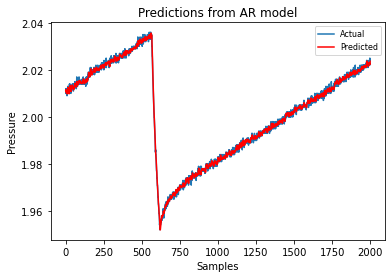

MSE=0.000001
R2=0.997
Test RMSE: 0.001
Test MAPE: 0.090


In [20]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error,r2_score
import numpy as np

from math import sqrt
# load dataset
series=pd.read_excel(r'C:\Users\Ronny\Desktop\ogauge_new\Range 14  for 2 bar.xlsx',header=0, index_col=0)
# split dataset
X = series.values
train, test = X[1:len(X)-2000], X[len(X)-2000:]
# train autoregression
window = 10
model = AutoReg(train, lags=10)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
mape = 100*(mean_absolute_percentage_error(test,predictions))
print('Test RMSE: %.3f' % rmse)
print('Test MAPE: %.3f' % mape)
# plot results
pyplot.title('Predictions from AR model')
pyplot.plot(test, label='Actual')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.xlabel('Samples')
pyplot.ylabel('Pressure')
pyplot.legend(loc='upper right', fontsize=8)
pyplot.show()
MSE = np.square(np.subtract(test,predictions)).mean()
R2 = r2_score(test,predictions)
print('MSE=%f'%MSE)
print('R2=%.3f'%R2)
rmse = sqrt(mean_squared_error(test, predictions))
mape = mean_absolute_error(test, predictions)*100
print('Test RMSE: %.3f' % rmse)
print('Test MAPE: %.3f' % mape)

In [9]:
mean = series.mean()

Variance = series.var()

SD = series.std()
print("Mean:",mean)

print("Variance:",Variance)

print("SD:",SD)

Mean: 2.011    2.002198
dtype: float64
Variance: 2.011    0.000415
dtype: float64
SD: 2.011    0.020361
dtype: float64
